# DSCI 100 Group 12 Project Proposal

# Imports

In [4]:
### Run this cell before continuing.
import random

import altair as alt
import pandas as pd
import sklearn
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics.pairwise import euclidean_distances

alt.data_transformers.disable_max_rows()
np.random.seed(1)

# Introduction

## Background

The sinking of the Titanic is one of the most known shipwrecks in history. The widely regarded "unsinkable" Titanic sank after striking an iceberg on April 15, 1912, while on her first voyage. Out of 2224 passengers and crew, 1502 perished because there were not enough lifeboats to go around.

Some people appeared to have higher survival rates than others, despite the fact that survival sometimes involved a certain amount of luck. Based on the provided passenger information, we’d love to explore the dataset and answer the question: what sorts of people were more likely to survive?

## Question

Given a passenger on the Titanic, predict whether they will survive the shipwreck.

## Dataset
The dataset we'll be using is from https://www.kaggle.com/competitions/titanic/data. It already splits our data into a training set to train our model with and a test set to evaluate our model on unseen data. 

The dataset contains a number of features such as the passengers sex, age, cabin number, and more. Our target variable will be the `Survival` feature which is 0 if the passenger did not survive, and 1 if they survived

# Preliminary Exploratory Data Analysis

## Reading the data
> Note: there doesn't seem to be a URL for the dataset. Therefore, we've downloaded the data from Kaggle using the link https://www.kaggle.com/competitions/titanic/data and have moved the csv files into a data directory.

In [5]:
training_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Cleaning and wrangling data into a tidy format

The data is already clean and wrangled. Namely
- Each row is a single observation (a single passenger)
- Each column is a single variable
- Each cell contains a single value

Furthermore, the column names are easy to read and use already (no spaces in them) and missing values are represented with `NaN`.

## Summarizing the Data

Here we use `DataFrame::info()` and `DataFrame::describe()` to discover

1. The number of observations for each column and whether we're missing any observations
2. What `Dtype` each column/feature has
3. The mean, std, quartiles, min and max of numerical features

In [6]:
display(training_data.info())
display(training_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We can see that the features with missing values include `Age`, `Cabin` and `Embarked`. `Cabin` has the most missing number of values, so it may not be useful for our model to learn this feature.

Furthermore, `Name` in our training set is a unique feature for each passenger, so it may not be that useful. We'll expand further on this in the [Methods](#methods) section.

Next, we find the number of observations in each class

In [7]:
display(training_data['Survived'].value_counts())
display(training_data['Survived'].value_counts(normalize=True))

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

We can see there are 549 passengers in the training set that did not survive (roughly 61%) and 342 passengers that survived (roughly 38%).

In [8]:
training_data.info()
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the info we can see that some age data are NULL (177 out of 891, 19.87%).

## Visualizing the Data


In [9]:
training_data_selected = training_data[training_data["Age"] != "NULL"].loc[:,["Survived","Sex","Pclass","Age","SibSp","Parch"]]
training_data_selected

,Survived,Sex,Pclass,Age,SibSp,Parch
0,0,male,3,22.0,1,0
1,1,female,1,38.0,1,0
2,1,female,3,26.0,0,0
3,1,female,1,35.0,1,0
4,0,male,3,35.0,0,0
...,...,...,...,...,...,...
886,0,male,2,27.0,0,0
887,1,female,1,19.0,0,0
888,0,female,3,NaN,1,2
889,1,male,1,26.0,0,0


For this project, we use Sex(gender identity), Age, Pclass(tickets of 1st, 2nd, 3rd class), Sibsp(whether the passenger have siblings or spouses), Parch(whether the passenger have parents or children) for analysis.

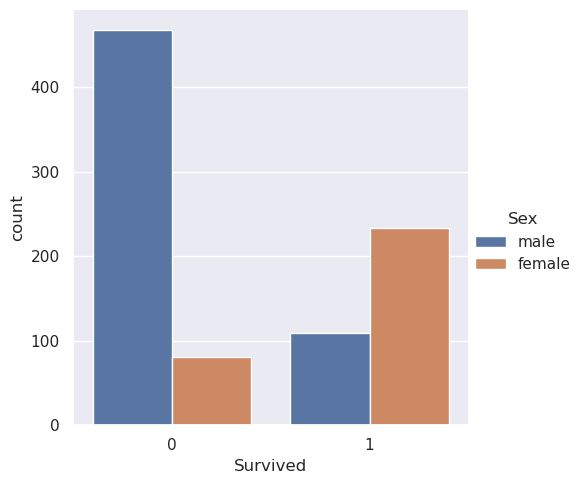

In [10]:
import seaborn as sns
sns.set()
sns.catplot(x = 'Survived', data = training_data_selected, kind = 'count', hue = 'Sex')

From this we can see that more female survived than male

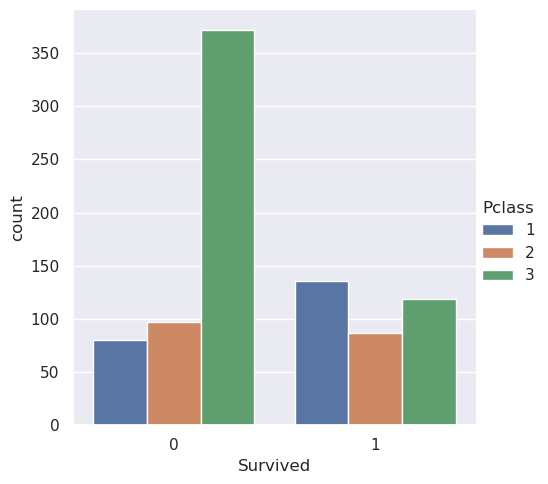

In [11]:
sns.catplot(x = 'Survived', data = training_data_selected, kind = 'count', hue = 'Pclass')

From this we can see that most people who failed to survived are from the 3rd class.

# Methods

TODO

# Expected Outcomes and Significance 

Through data analysis with classification, we want to figure out what sort of people were more likely to survive from Titanic shipwrecks. As we classify the training data set, we could find specific variables/features such as “sex” or “ticket class” that influence the likelihood of survival in the Titanic disaster. For example, we would expect that passengers with higher ticket classes or those who lived in higher cabin numbers might have survived more than other groups of people. The impact of these findings can help us better understand which groups of people were more likely to survive than others. This could lead to future questions such as whether these groups shared similarities to survivors of other large-scale boat accidents or natural disasters that also resulted in a large number of deaths. Lastly, we could use these findings and further research methodologies to maximize the number of survivors in case an event like this were to happen again.